Data: https://app.roboflow.com/thesis-shtjy/thai-food-detection/

In [ ]:
!nvidia-smi

Mon Feb  3 06:10:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7zPQCB9ZLxPFODipmpwH")
project = rf.workspace("thesis-shtjy").project("thai-food-detection")
version = project.version(11)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/Thai-Food-Detection-11'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=8 imgsz=224

100% 5.35M/5.35M [00:00<00:00, 106MB/s]
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Thai-Food-Detection-11/data.yaml, epochs=8, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

**Step # 05 Examine Training Results**

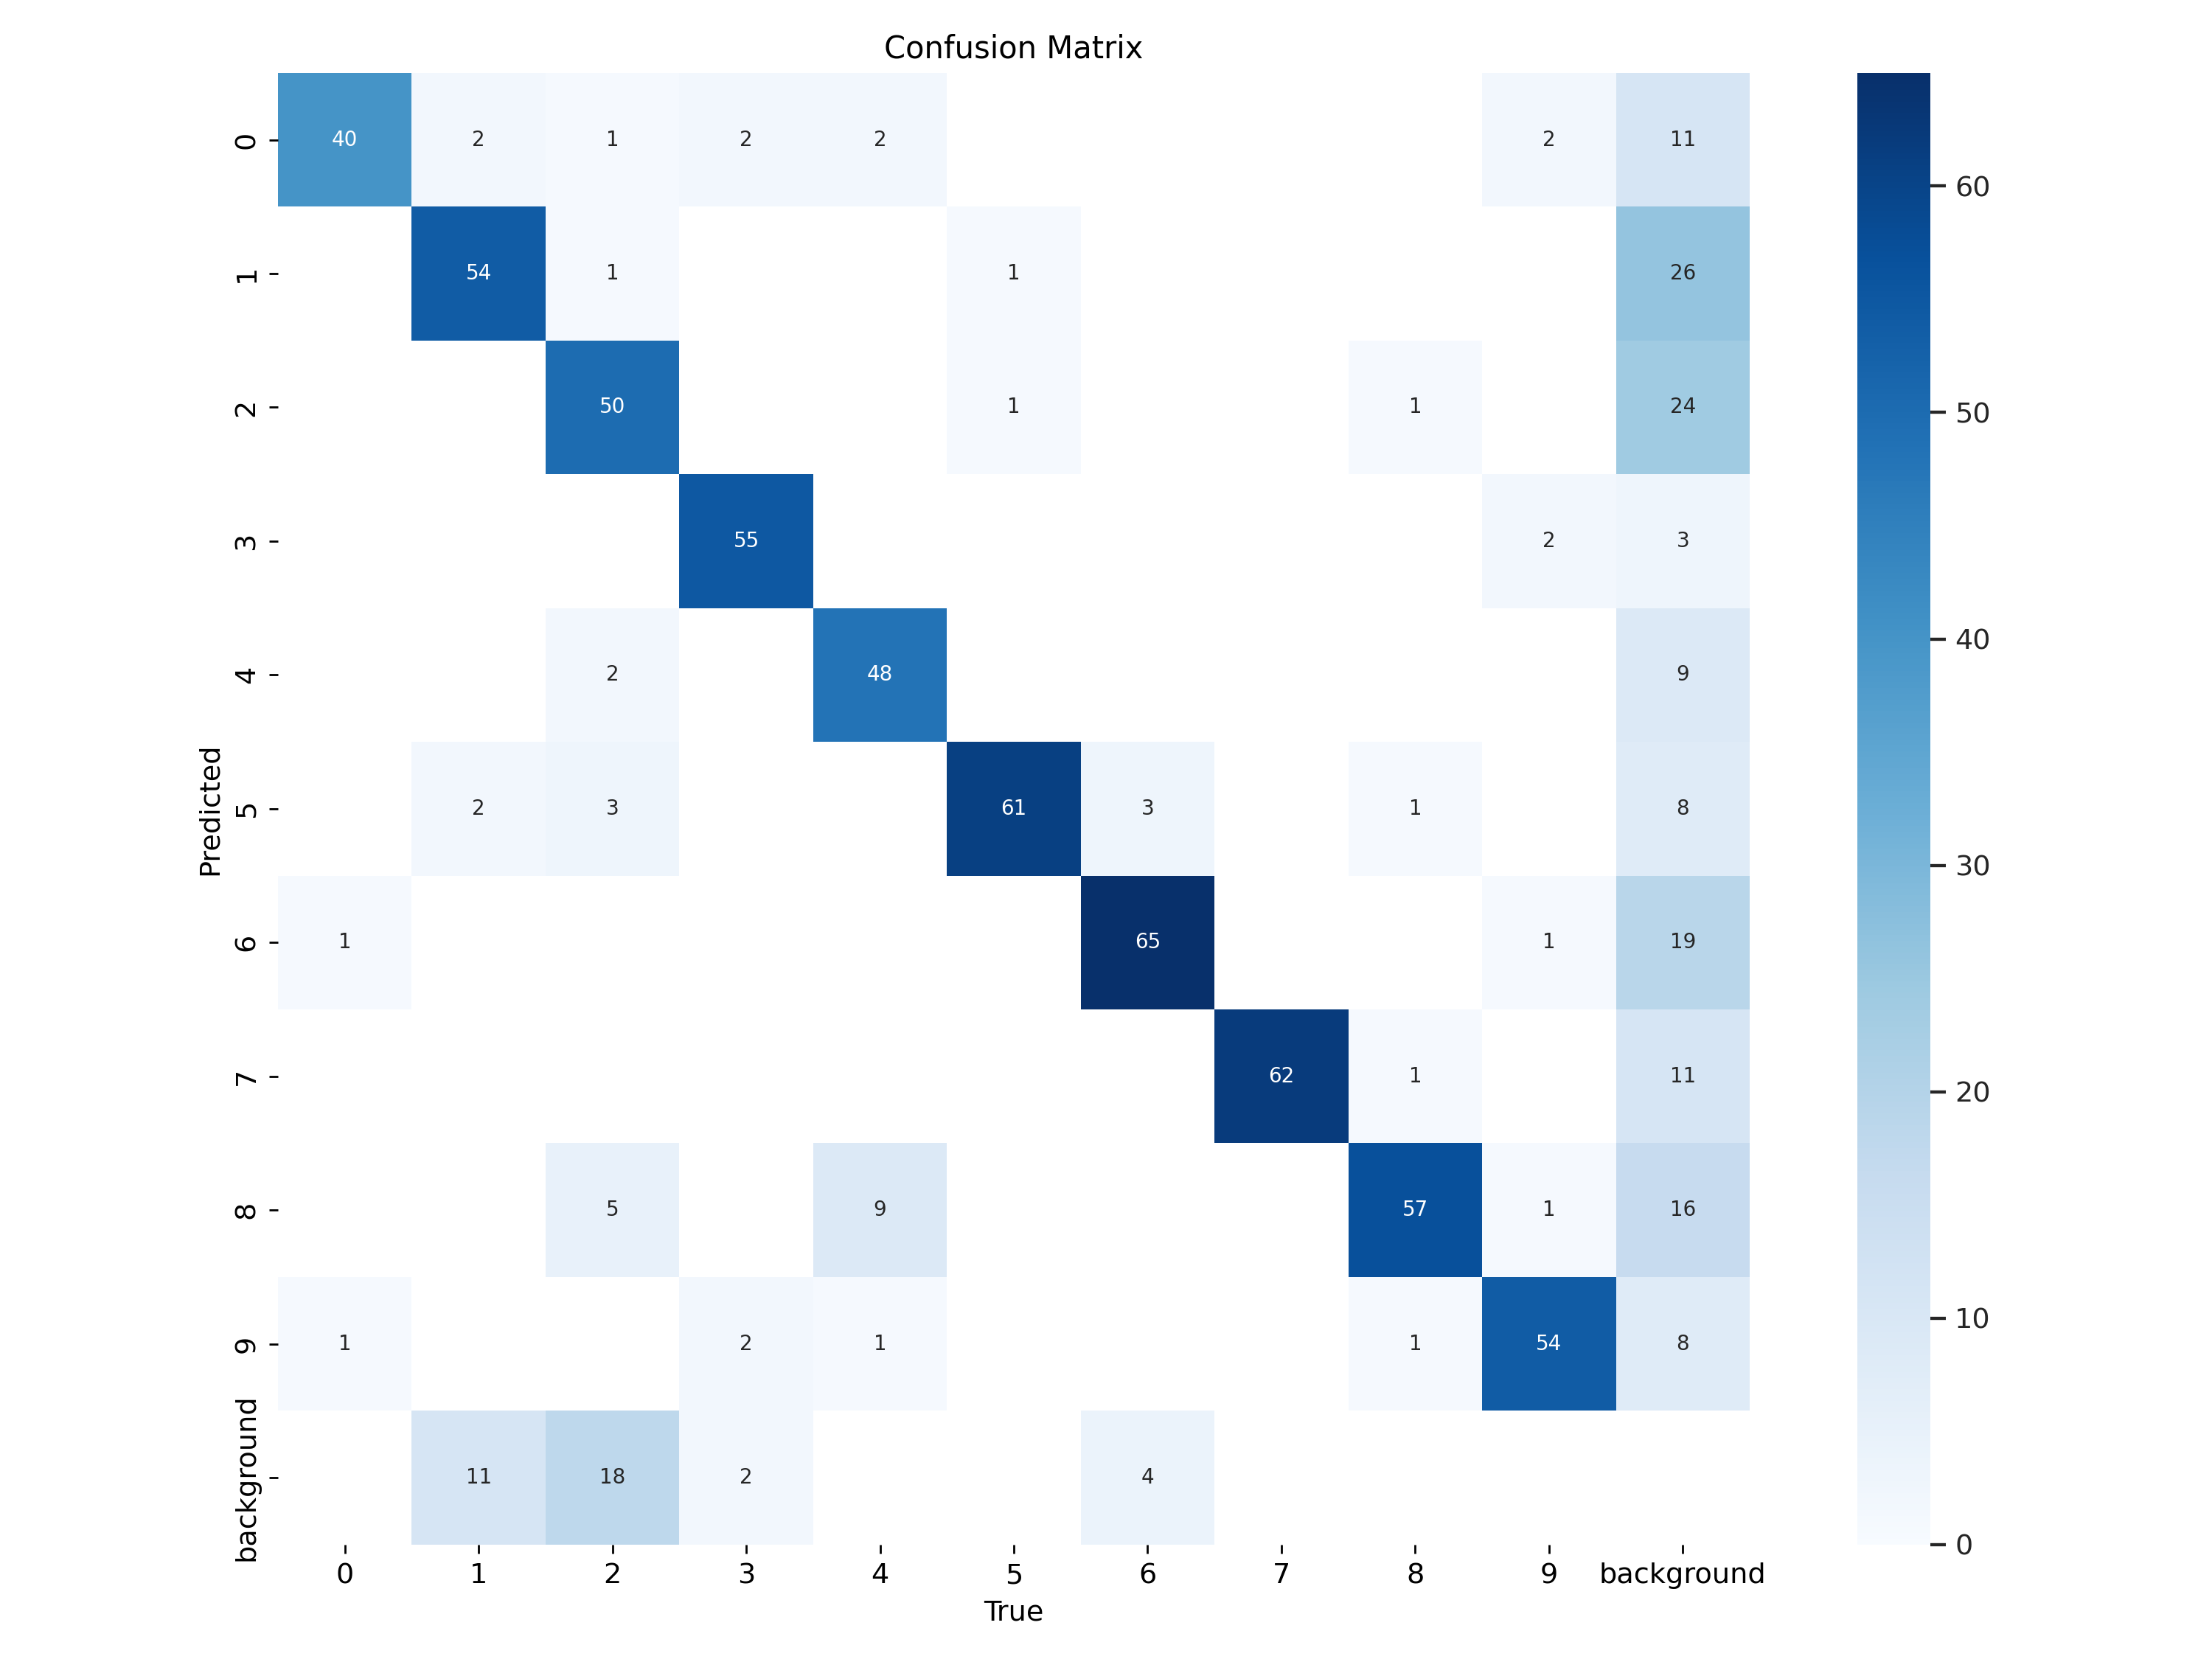

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

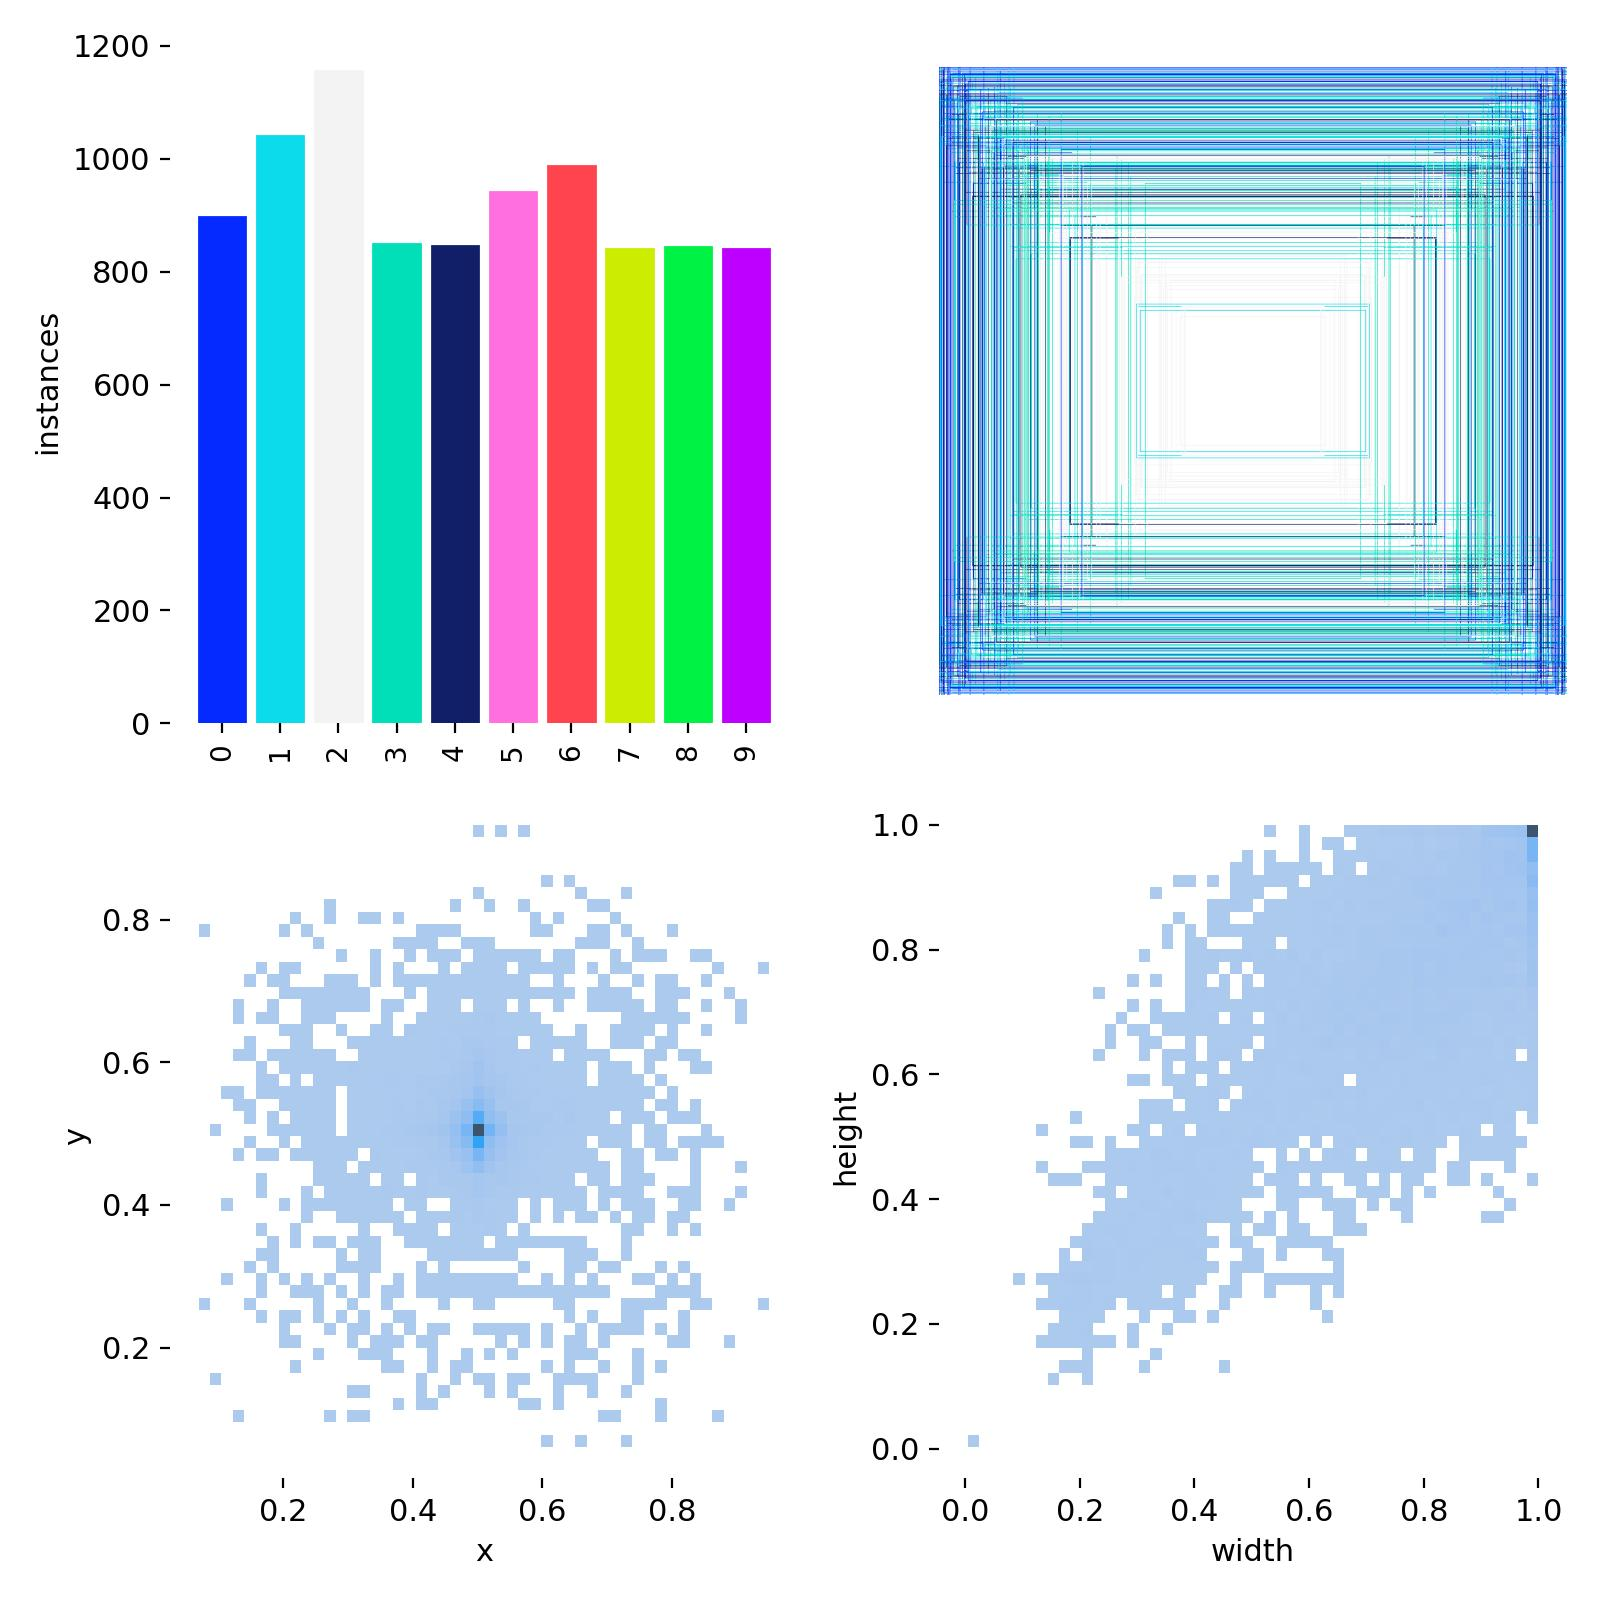

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

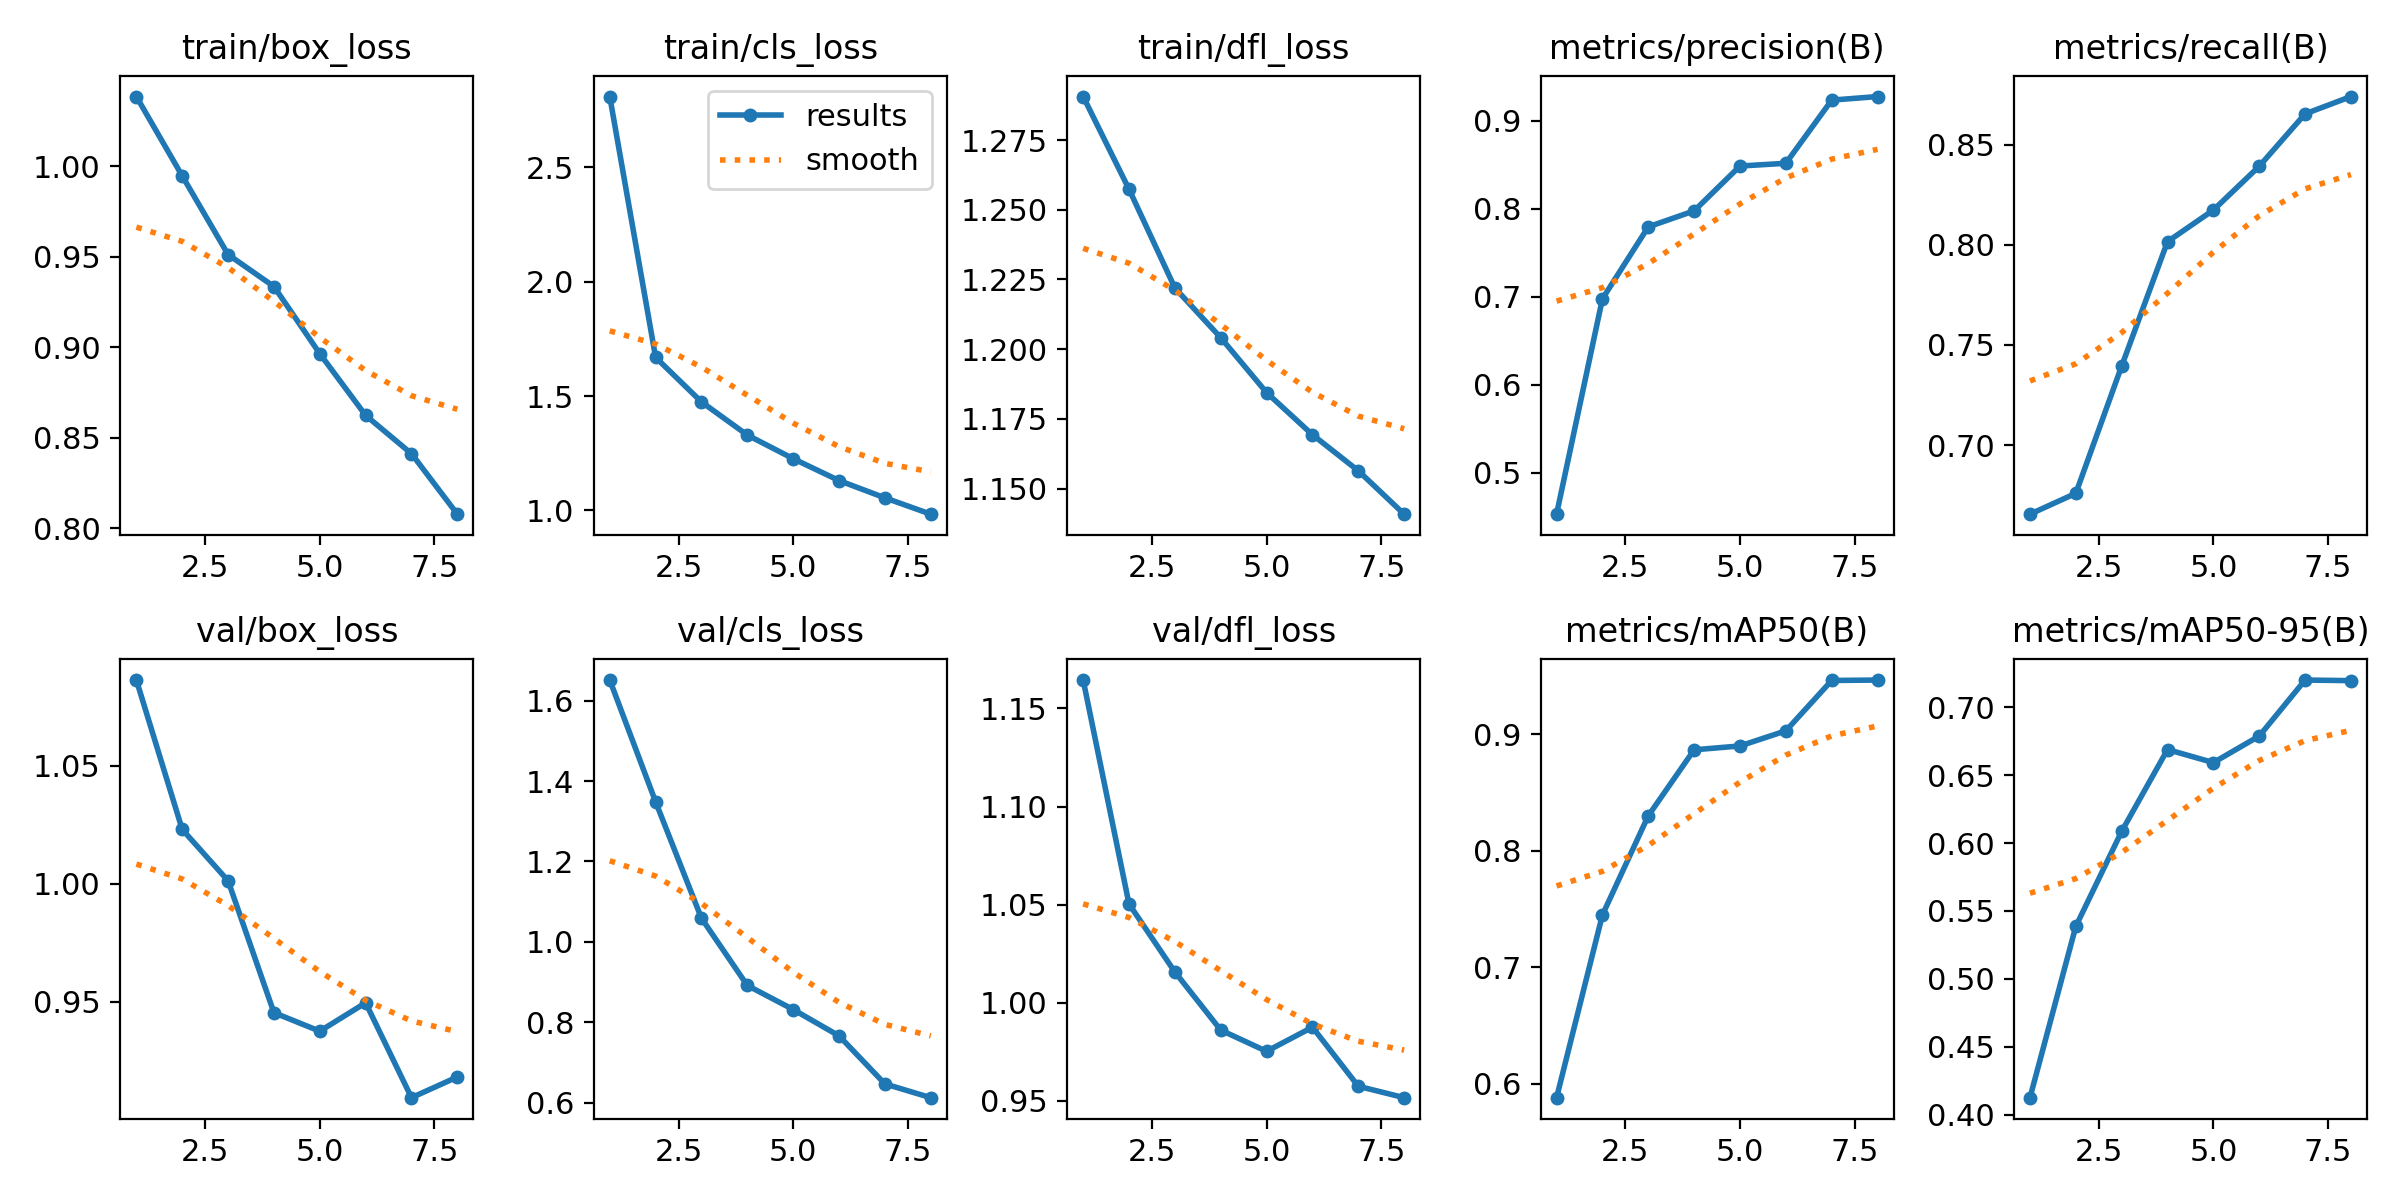

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

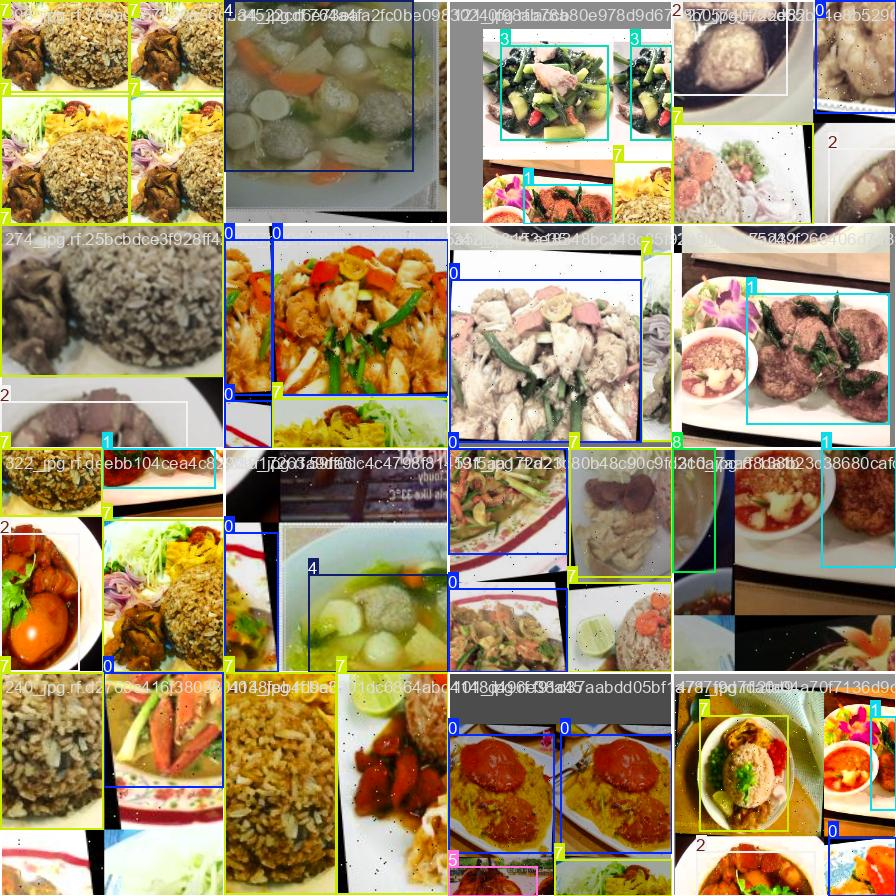

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

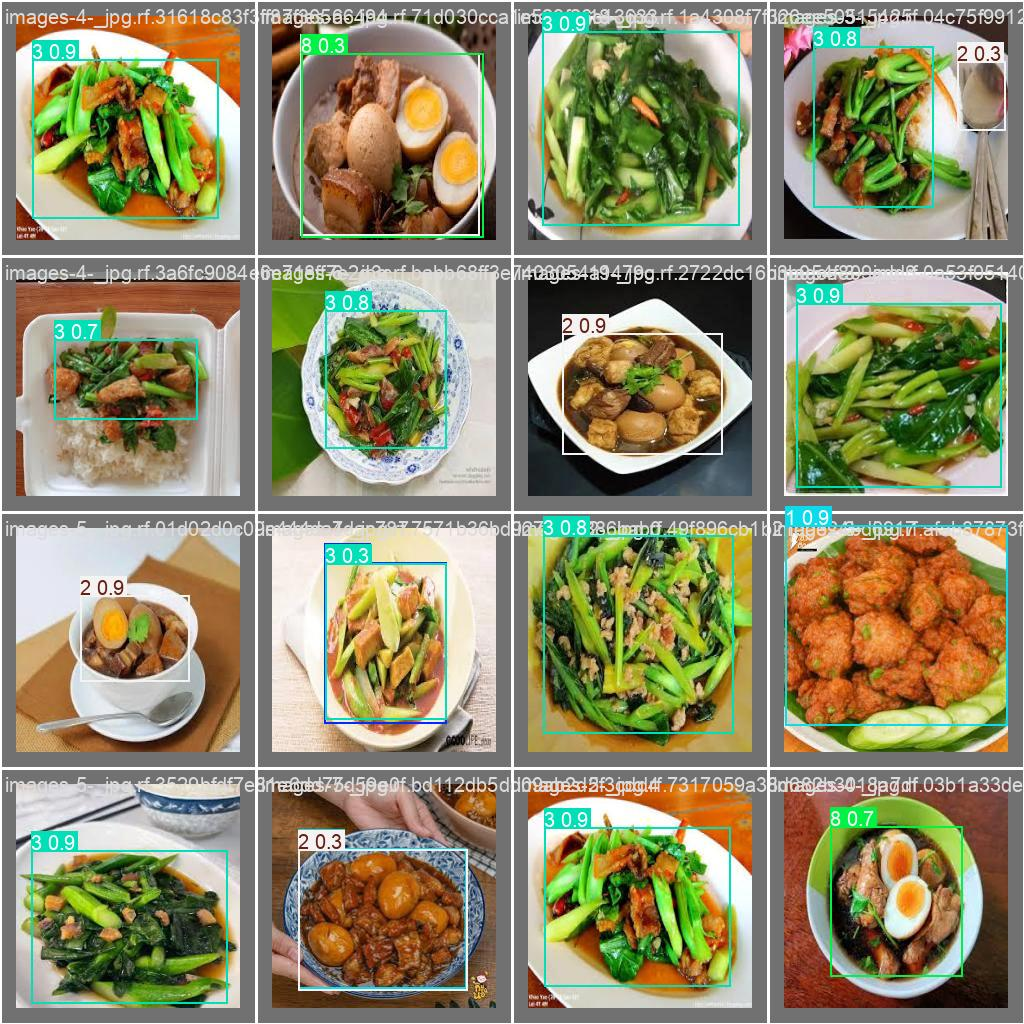

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

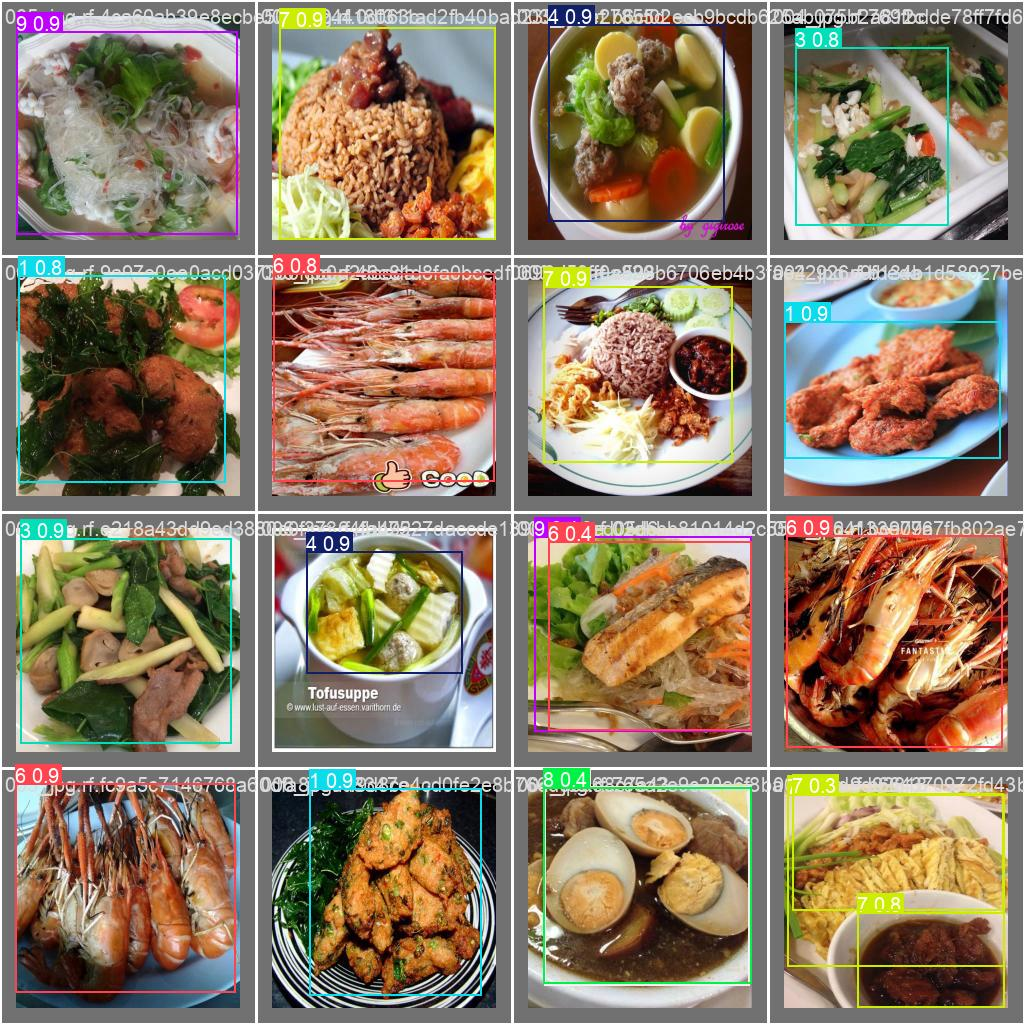

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 06 Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Thai-Food-Detection-11/valid/labels.cache... 582 images, 0 backgrounds, 0 corrupt: 100% 582/582 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 630. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 37/37 [00:03<00:00, 10.57it/s]
                   all        582        630      0.923      0.865      0.946       0.72
                     0         42         42       0.87      0.952      0.975      0.781
                     1         60         69      0.913      0.754      0.834      0.677
                     2         60   

**Step # 07 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.5 source={dataset.location}/test/images save=True save_txt=True save_conf=True

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

image 1/600 /content/Thai-Food-Detection-11/test/images/001_jpg.rf.0c75935897a6d1cfe078db2fba0f6a99.jpg: 224x224 1 0, 26.6ms
image 2/600 /content/Thai-Food-Detection-11/test/images/001_jpg.rf.2f4d67b81dddbb6bd50405bfe10570ef.jpg: 224x224 1 1, 15.5ms
image 3/600 /content/Thai-Food-Detection-11/test/images/001_jpg.rf.5fa540a3d3ec0091623e42615770bcac.jpg: 224x224 1 3, 15.5ms
image 4/600 /content/Thai-Food-Detection-11/test/images/002_jpg.rf.0908f46294390b8dfbf8da9d202d2cd8.jpg: 224x224 1 0, 14.4ms
image 5/600 /content/Thai-Food-Detection-11/test/images/002_jpg.rf.12248184e0bda9a3c5ba867bb9164c1a.jpg: 224x224 1 7, 14.0ms
image 6/600 /content/Thai-Food-Detection-11/test/images/002_jpg.rf.784c6d16eddcf60863398fa58a5ed8e4.jpg: 224x224 1 2, 14.5ms
image 7/600 /content/Thai-Food-Detection-11/test/images/002_jpg.rf.fe20f63010a870e80

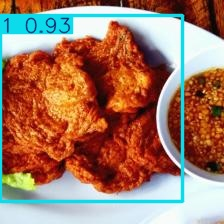

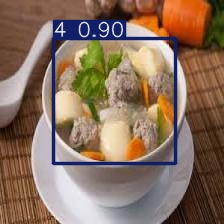

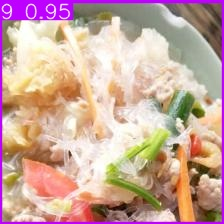

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.5 source="/content/test pic.png" save=True


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,102 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/test pic.png: 224x224 1 1, 1 2, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 171.7ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


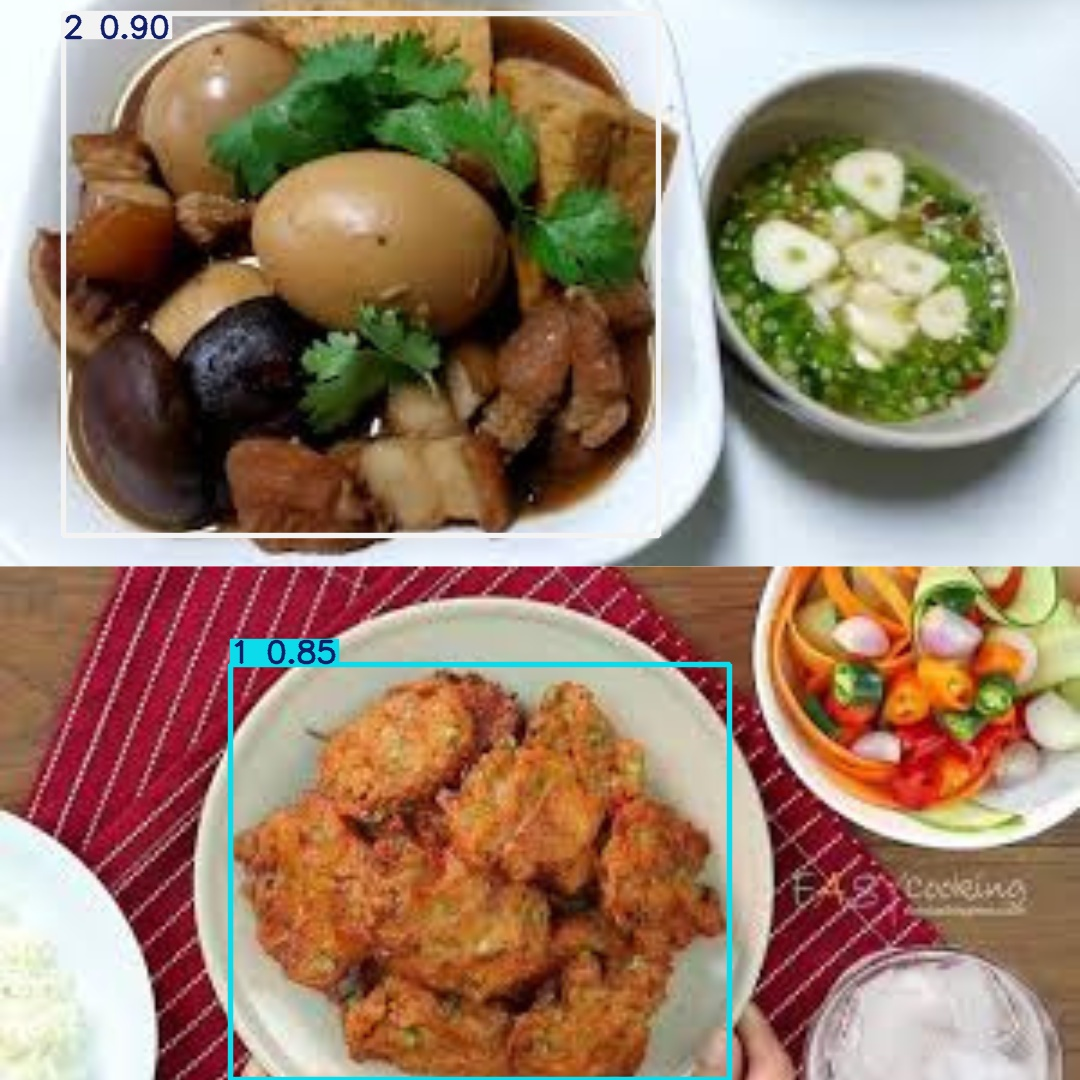

In [ ]:
Image("/content/runs/detect/predict3/test pic.jpg", width=600)

**Step # 08 Inference with Custom Model on Videos**